In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [13]:
data = {
    'Covid': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No'],
    'Flu': ['No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes'],
    'Fever': ['Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No']
}
df = pd.DataFrame(data)


In [14]:
label_encoder = LabelEncoder()
df['Covid'] = label_encoder.fit_transform(df['Covid'])
df['Flu'] = label_encoder.fit_transform(df['Flu'])
df['Fever'] = label_encoder.fit_transform(df['Fever'])

In [15]:
# Select features (X) and target variable (y)
X = df[['Covid', 'Flu']].values
y = df['Fever'].values

print("Preprocessed dataset:")
print(df)

Preprocessed dataset:
   Covid  Flu  Fever
0      1    0      1
1      0    1      1
2      1    1      1
3      0    0      0
4      1    0      1
5      0    0      1
6      1    0      1
7      1    0      0
8      0    1      1
9      0    1      0


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Perform feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Training set:")
print(X_train)
print("Test set:")
print(X_test)


Training set:
[[-0.8660254   1.58113883]
 [-0.8660254   1.58113883]
 [ 1.15470054 -0.63245553]
 [ 1.15470054 -0.63245553]
 [-0.8660254  -0.63245553]
 [ 1.15470054 -0.63245553]
 [-0.8660254  -0.63245553]]
Test set:
[[ 1.15470054  1.58113883]
 [-0.8660254   1.58113883]
 [ 1.15470054 -0.63245553]]


In [43]:
from sklearn.naive_bayes import GaussianNB

# Fit Naive Bayes to the training set
classifier = GaussianNB()
classifier.fit(X_train, y_train)


GaussianNB()

In [44]:
# Predict the test set results
y_pred = classifier.predict(X_test)

print("Predictions:")
print(y_pred)
2

Predictions:
[1 0 1]


2

Confusion Matrix:
            Predicted No  Predicted Yes
Actual No              0              0
Actual Yes             1              2


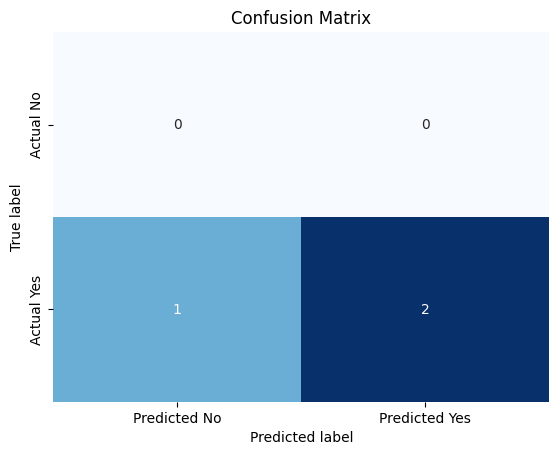

Accuracy: 0.6666666666666666


In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
confusion = confusion_matrix(y_test, y_pred)
confusion_df = pd.DataFrame(confusion, index=['Actual No', 'Actual Yes'], columns=['Predicted No', 'Predicted Yes'])

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_df)

# Visualize the confusion matrix
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
